# Visualization of the dataset

This notebook will showcase different visualizations of the dataset, to get a better understanding of the data before creating the different models.

## Importing libraries and dataset

Firstly, different libraries for visualizations can be imported.

In [3]:
import folium
import numpy as np
import pandas as pd
import os
import random

from matplotlib import pyplot as plt
from matplotlib import image as mpimg


Then the CSV file containing fires in Oregon can be imported.

In [80]:
fire = pd.read_csv('https://raw.githubusercontent.com/meriams/ABA-project-/main/Oregon_data.csv')

Next the CSV file containing information of the places found, where there were no fire can be imported.

In [81]:
no_fire = pd.read_csv("https://raw.githubusercontent.com/meriams/ABA-project-/main/nofiredata.csv")


In [82]:
no_fire[['Lat', 'Long']] = no_fire['Coordinates'].str.split(',', 1, expand=True)

Fires without latitude and longitude can be removed, since it's not possible to generate satellite photos for those fires.

In [83]:
fire.dropna(subset=['Lat_DD', 'Long_DD'], inplace=True)

## Mapping of fires and non fires in the dataset

Using the name of satellite photos generated and the dataset containing information of the fires/no fires, the different satellite photos generated can be mapped to visualize how they are place in Oregon.

In [84]:
# Saving names of fire pictures
fire_folder_path = "fire"
file_names = os.listdir(fire_folder_path)
fire_names = [file[:-4] for file in file_names]

In [85]:
# Creating a map of Oregon
oregon_map = folium.Map(location=[44.0, -120.5], zoom_start=7)


# Plot each fire
for spot in fire_names:
    lat = fire.Lat_DD[fire.FullFireNumber == spot].iloc[0]
    long = fire.Long_DD[fire.FullFireNumber == spot].iloc[0]
    folium.CircleMarker(location=[lat, long], radius=1, color='red', fill=True, fill_color='red').add_to(oregon_map)


In [86]:
# Saving names of no fire pictures
no_fire_folder_path = "/Users/christopherhardinielsen/Desktop/DTU/Kandidat/Business Analytics Advanced/no_fire"
file_names = os.listdir(no_fire_folder_path)
no_fire_names = [file[:-4] for file in file_names]



In [ ]:
# Plot each no fire spot spot
for spot in no_fire_names:
    lat = no_fire.Lat[no_fire['ID Number'] == int(spot)]
    long = no_fire.Long[no_fire['ID Number'] == int(spot)]
    if len(lat) > 0:
        lat = lat.iloc[0][1:]
        long = long.iloc[0][:-1]
        folium.CircleMarker(location=[lat, long], radius=1, color='green', fill=True, fill_color='green').add_to(oregon_map)
        

# Display the map
oregon_map


Red is fires from the Oregon dataset and green is locations with no fires random generated for the dataset

## Showcase the satellite photos

Next random satellite photos and their location can be showcased to get a better understanding of if or what differentiates the fires and no fires pictures, other than they is a pattern in the placement of the fires. First a random satellite photos with fire can be shown.

### Fire

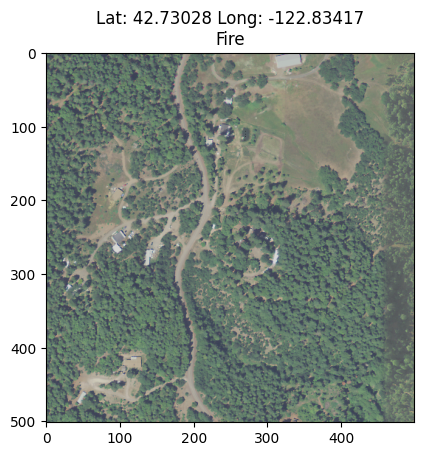

In [97]:
spot = random.choice(fire_names)
lat = fire.Lat_DD[fire.FullFireNumber == spot].iloc[0]
long = fire.Long_DD[fire.FullFireNumber == spot].iloc[0]

random_spot = folium.Map(location=[lat, long], zoom_start=6, width=400, height=400)
folium.CircleMarker(location=[lat, long], radius=0.01, color='red', fill=True, fill_color='red').add_to(random_spot)


image = mpimg.imread(f"{fire_folder_path}/{spot}.png")
plt.title(f'Lat: {lat} Long: {long}\nFire')
plt.imshow(image)
plt.show()
random_spot

### No fire

In [2]:
spot = random.choice(no_fire_names)
lat = no_fire.Lat[no_fire['ID Number'] == int(spot)]
long = no_fire.Long[no_fire['ID Number'] == int(spot)]
lat = lat.iloc[0][1:]
long = long.iloc[0][:-1]
random_spot = folium.Map(location=[lat, long], zoom_start=6, width=400, height=400)
folium.CircleMarker(location=[lat, long], radius=1, color='green', fill=True, fill_color='green').add_to(random_spot)


image = mpimg.imread(f"{no_fire_folder_path}/{spot}.png")
plt.title(f'Lat: {lat} Long: {long}\nNo fire')
plt.imshow(image)
plt.show()

random_spot

NameError: name 'no_fire_names' is not defined

# Partial conclusion

There exist a clear pattern in where the fires are located. It's as expected not possibly to directly see based on a satellite photo whether it is at risk of wildfires. Here the models combined with Grad-CAM will be able to better showcase what patterns in the sattelite photos could be a pattern a sign of risk of wildfire.